In [1]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt
import time
import numpy as np

In [3]:
#%load_ext autoreload
#%autoreload 2

from DSTPolarimeterPlotLib import plotResidual
from script_to_run_on_kipsua import Main

In [8]:
dtor = 0.017453292519943295

---

## fitting variables

|variable|meaning|fixed or free|
|--------|-------|-------------|
|xn|diattenuation of Newton mirror|free|
|tn|retardation of Newton mirror|free|
|xc|diattenuation of Coude mirror|free|
|tc|retardation of Coude mirror|free|
|sc|stray light|free|
|t_en|retardance of entrance window|fixed|
|dlen|ngle of the axis of entrance window|fixed|
|t_ex|retardance of exit window|fixed|
|dlex|angle of the axis of exit window|fixed|
|th_dst_mmsp2|angle between DST and MMSP2|free|
|th_mmsp2_hsp|angle between MMSP2 and Analyzer|free|
|par_mmsp2_0~15|not used|fixed|
|par_mmsp2_16~31|mirror's mueller matrix|00:fixed, others:free|
|par_mmsp2_32|theta1: not used|fixed to 0|
|par_mmsp2_33|theta2: not used|fixed to 0|

## math equation:

- difference between observed rotation angle and the angle in database,


$$ dangle = (angle_{obs} - angle_{data}) \cdot \; !dtor $$


- Mueller Matrix of image rotator,


$$ mmir = R(dangle) \cdot \; mmir_{data} \cdot \; R(-dangle) \cdot \; R((88.2 - 358.2)*!dtor)$$


- total Mueller Matrix of folding mirror and image rotator


$$ mmsp2   = mmir @ mm45 $$


- telescope's Mueller Matrix


$$ mm_{telescope} = R(-azimuth+\pi) \cdot \; Waveplate_{exit} \cdot \; Mirror_{coude} \cdot \; ReverseUV \cdot \; R(\pm zd) \cdot \; Mirror_{newton} \cdot \; ReverseUV \cdot \; Waveplate_{entrance} $$


- combining all


$$ mat = R(th-mmsp2-hsp) \cdot \; mmsp2 \cdot \; R(th-dst-mmsp2) \cdot \; mm_{telescope} $$


- effect of stray light


$$ responseMatrix = M_{strayLight} \cdot \; mat $$

---

# 20171128

In [3]:
%run scipt_to_run_on_kipsua.py /nwork/kouui/dstsp/data/calibration/20171128/camera01/cal /nwork/kouui/dstsp/data/calibration/20171128/camera01/cal


['scipt_to_run_on_kipsua.py', '/nwork/kouui/dstsp/data/calibration/20171128/camera01/cal', '/nwork/kouui/dstsp/data/calibration/20171128/camera01/cal']
pathData     :  /nwork/kouui/dstsp/data/calibration/20171128/camera01/cal
pathCamera01 :  /nwork/kouui/dstsp/data/calibration/20171128/camera01/cal
--- Preparing fitting process ---
ref_index ref_time ok.
calibration data dictionary ok.
Array iquv and hd ok.
iquv : 3.09375 GB
order_no_bad ok.
mm45_flat, matImageRotatorSeries ok.
--- Start fitting process ---
time used in fitting:  3.843099
Fitting iquv_mean complete.


uniform sigma

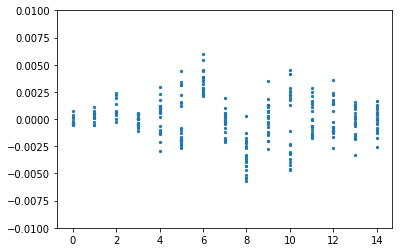

In [7]:
plt.scatter(main.key, main.result_Mean.residual*main.sigma, s=5);
plt.ylim(-0.01,0.01);

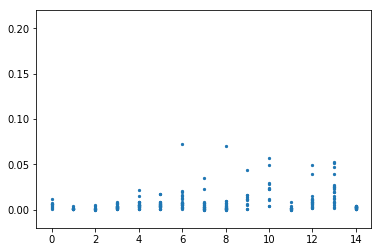

In [8]:
plt.scatter(main.key, abs(main.result.residual)*main.sigma, s=5);
plt.ylim(-0.02,0.22);

tolerance sigma

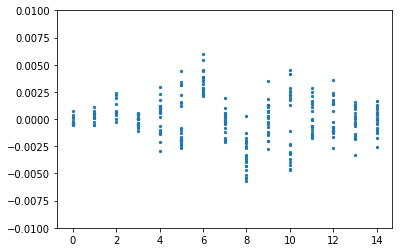

In [8]:
plt.scatter(main.key, main.result.residual*main.sigma, s=5);
plt.ylim(-0.01,0.01);

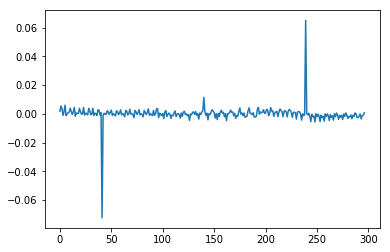

In [101]:
plt.plot(main.result.residual*main.sigma)

In [4]:
main.result.message, main.result.success

('Fit succeeded. Could not estimate error-bars.', True)

In [8]:
main.result.lmdif_message

'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000'

In [9]:
main.result.nvarys, main.result.ndata, main.result.nfree

(23, 258, 235)

In [102]:
main.result.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
dlen                 0     -inf      inf        0    False     None     None
dlex                 0     -inf      inf        0    False     None     None
par_mmsp2_0          0       -1        1        0    False     None     None
par_mmsp2_1          0       -1        1        0    False     None     None
par_mmsp2_10         0       -1        1        0    False     None     None
par_mmsp2_11         0       -1        1        0    False     None     None
par_mmsp2_12         0       -1        1        0    False     None     None
par_mmsp2_13         0       -1        1        0    False     None     None
par_mmsp2_14         0       -1        1        0    False     None     None
par_mmsp2_15         0       -1        1        0    False     None     None
par_mmsp2_16    0.4598       -1        1        0    False     None     None
par_mmsp2_17  -0.009947       -1        1    70.18     True     None     N

In [14]:
(88.2 - 131.2), 2.3/dtor

(-42.999999999999986, 131.78023640228494)

In [15]:
-2.4/dtor

-137.50981189803645

# try 2dmap 20171128 camera01

In [4]:
pathData = "/nwork/kouui/dstsp/data/calibration/20171128/camera01/cal"
pathCamera01 = "/nwork/kouui/dstsp/data/calibration/20171128/camera01/cal"

## uniform sigma

In [5]:
isSigma=False
main_uniform = Main(isDebug=False)
main_uniform.run(pathData, pathCamera01, threshold=129626, nCPU=1, isMap=True, isSigma=isSigma)
del main_uniform.iquv
del main_uniform.iquv_mean

--- Preparing fitting process ---
--- Start fitting process ---
time used in fitting:  3.915828
Fitting iquv_mean complete.
time used in fitting:  3.399164
time used in fitting:  2.991824
time used in fitting:  3.348844
time used in fitting:  2.947901
time used in fitting:  3.418416
time used in fitting:  4.326085
time used in fitting:  3.772877
time used in fitting:  2.878347
time used in fitting:  2.920602
time used in fitting:  3.31369
time used in fitting:  2.911819
time used in fitting:  3.310445
time used in fitting:  3.33614
time used in fitting:  3.402713
time used in fitting:  3.32004
time used in fitting:  3.323275
time used in fitting:  3.329101
time used in fitting:  2.886765
time used in fitting:  3.427821
time used in fitting:  2.888493
time used in fitting:  2.993507
time used in fitting:  3.515906
time used in fitting:  4.237152
time used in fitting:  4.234366
time used in fitting:  3.33225
time used in fitting:  3.330498
time used in fitting:  3.33848
time used in fitt

In [6]:
import pickle

with open('/nwork/kouui/dstsp/20171128Camera01_8600A_19by7_uniformSigma.pickle', 'wb') as handle:
    pickle.dump(main_uniform, handle, protocol=pickle.HIGHEST_PROTOCOL)

### show fitting result

In [11]:
ha  = main_uniform.hd['ha']/3600.*15.*dtor
key = main_uniform.key.astype(np.int16)

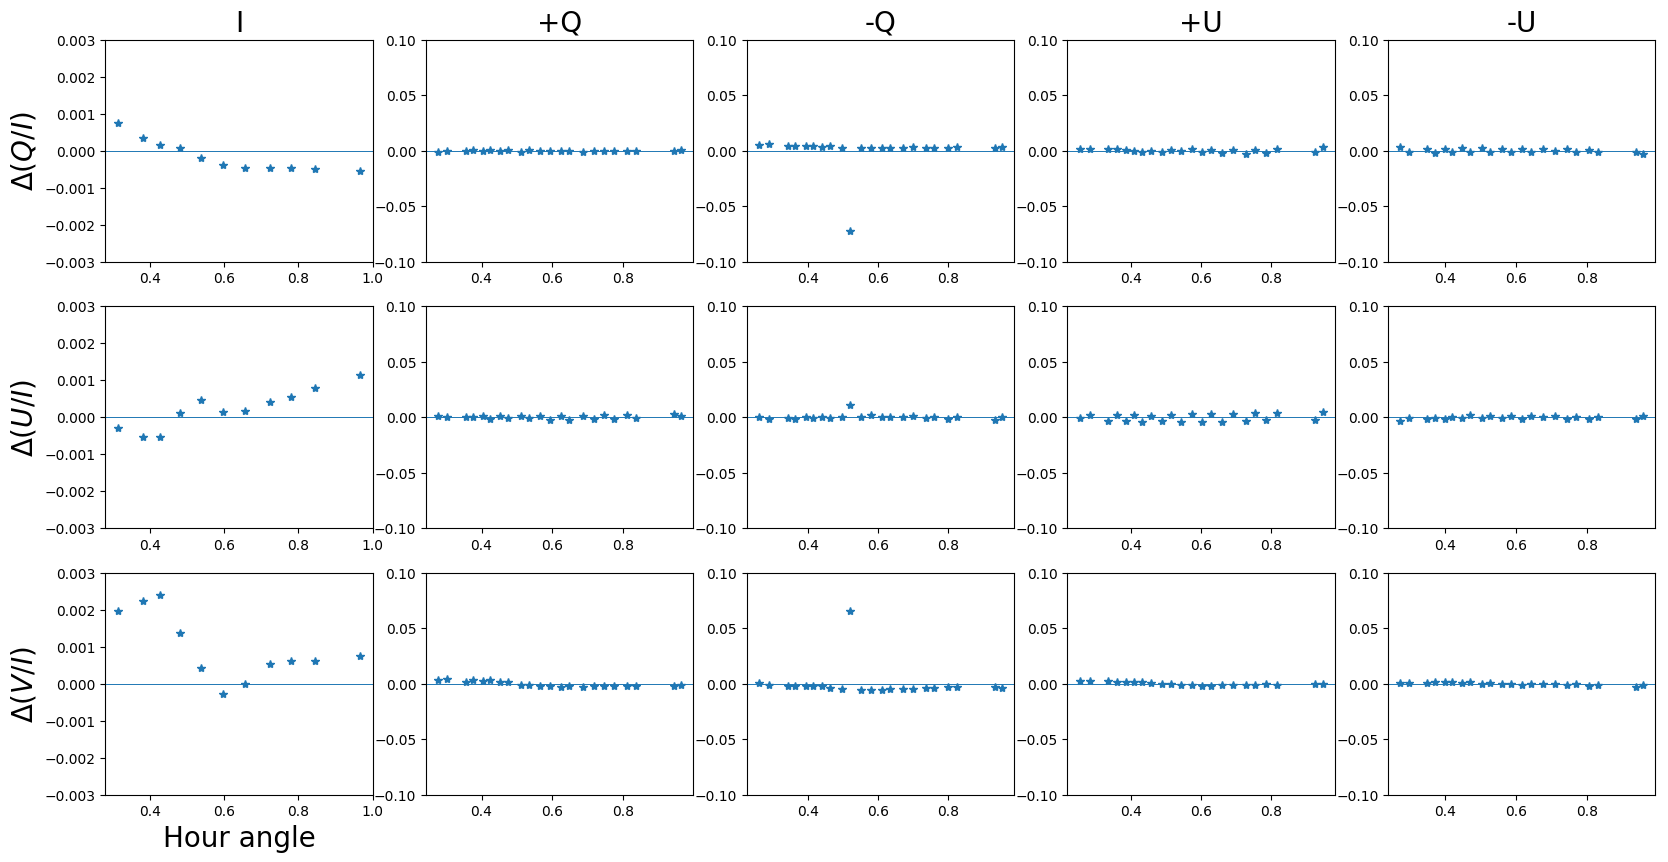

In [14]:
plotResidual(main_uniform.result_Mean.residual*main_uniform.sigma, ha, key, ylim_I=0.003)

### how I image looks like

In [91]:
#
from scipy.io import readsav
import matplotlib.patches as patches

In [18]:
#
path = "/nwork/kouui/dstsp/data/calibration/20171128/camera01/cale_iquv0000.sav"
saveFile = readsav(path)

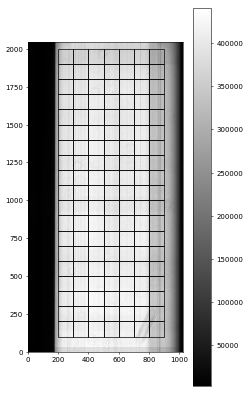

In [98]:
#
batchsize = 100
y_start, x_start = 100,200
y_end, x_end =  2000, 900
nx = int( (x_end-x_start)/batchsize  )
ny = int( (y_end-y_start)/batchsize  )

fig, ax = plt.subplots(1,1, figsize=(5,10), dpi=50)
im = ax.imshow(saveFile['iquv'][35,0,:,:], cmap='gray', origin="lower")
plt.colorbar(im,ax=ax)
#ax.add_patch(patches.Rectangle())

for i in range(ny):
    for j in range(nx):
        ax.add_patch( 
            patches.Rectangle(
            (x_start+j*batchsize, y_start+i*batchsize),   # (x,y)
            batchsize,          # width
            batchsize,          # height
            fill=False
        ))


### Map of response matrix

In [31]:
main_uniform.result_Mean.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
dlen                 0     -inf      inf        0    False     None     None
dlex                 0     -inf      inf        0    False     None     None
par_mmsp2_0          0       -1        1        0    False     None     None
par_mmsp2_1          0       -1        1        0    False     None     None
par_mmsp2_10         0       -1        1        0    False     None     None
par_mmsp2_11         0       -1        1        0    False     None     None
par_mmsp2_12         0       -1        1        0    False     None     None
par_mmsp2_13         0       -1        1        0    False     None     None
par_mmsp2_14         0       -1        1        0    False     None     None
par_mmsp2_15         0       -1        1        0    False     None     None
par_mmsp2_16    0.4598       -1        1        0    False     None     None
par_mmsp2_17  -0.009947       -1        1    70.18     True     None     N

In [33]:
np.rad2deg(0.54), np.rad2deg(-0.25)

(30.939720937064457, -14.323944878270581)

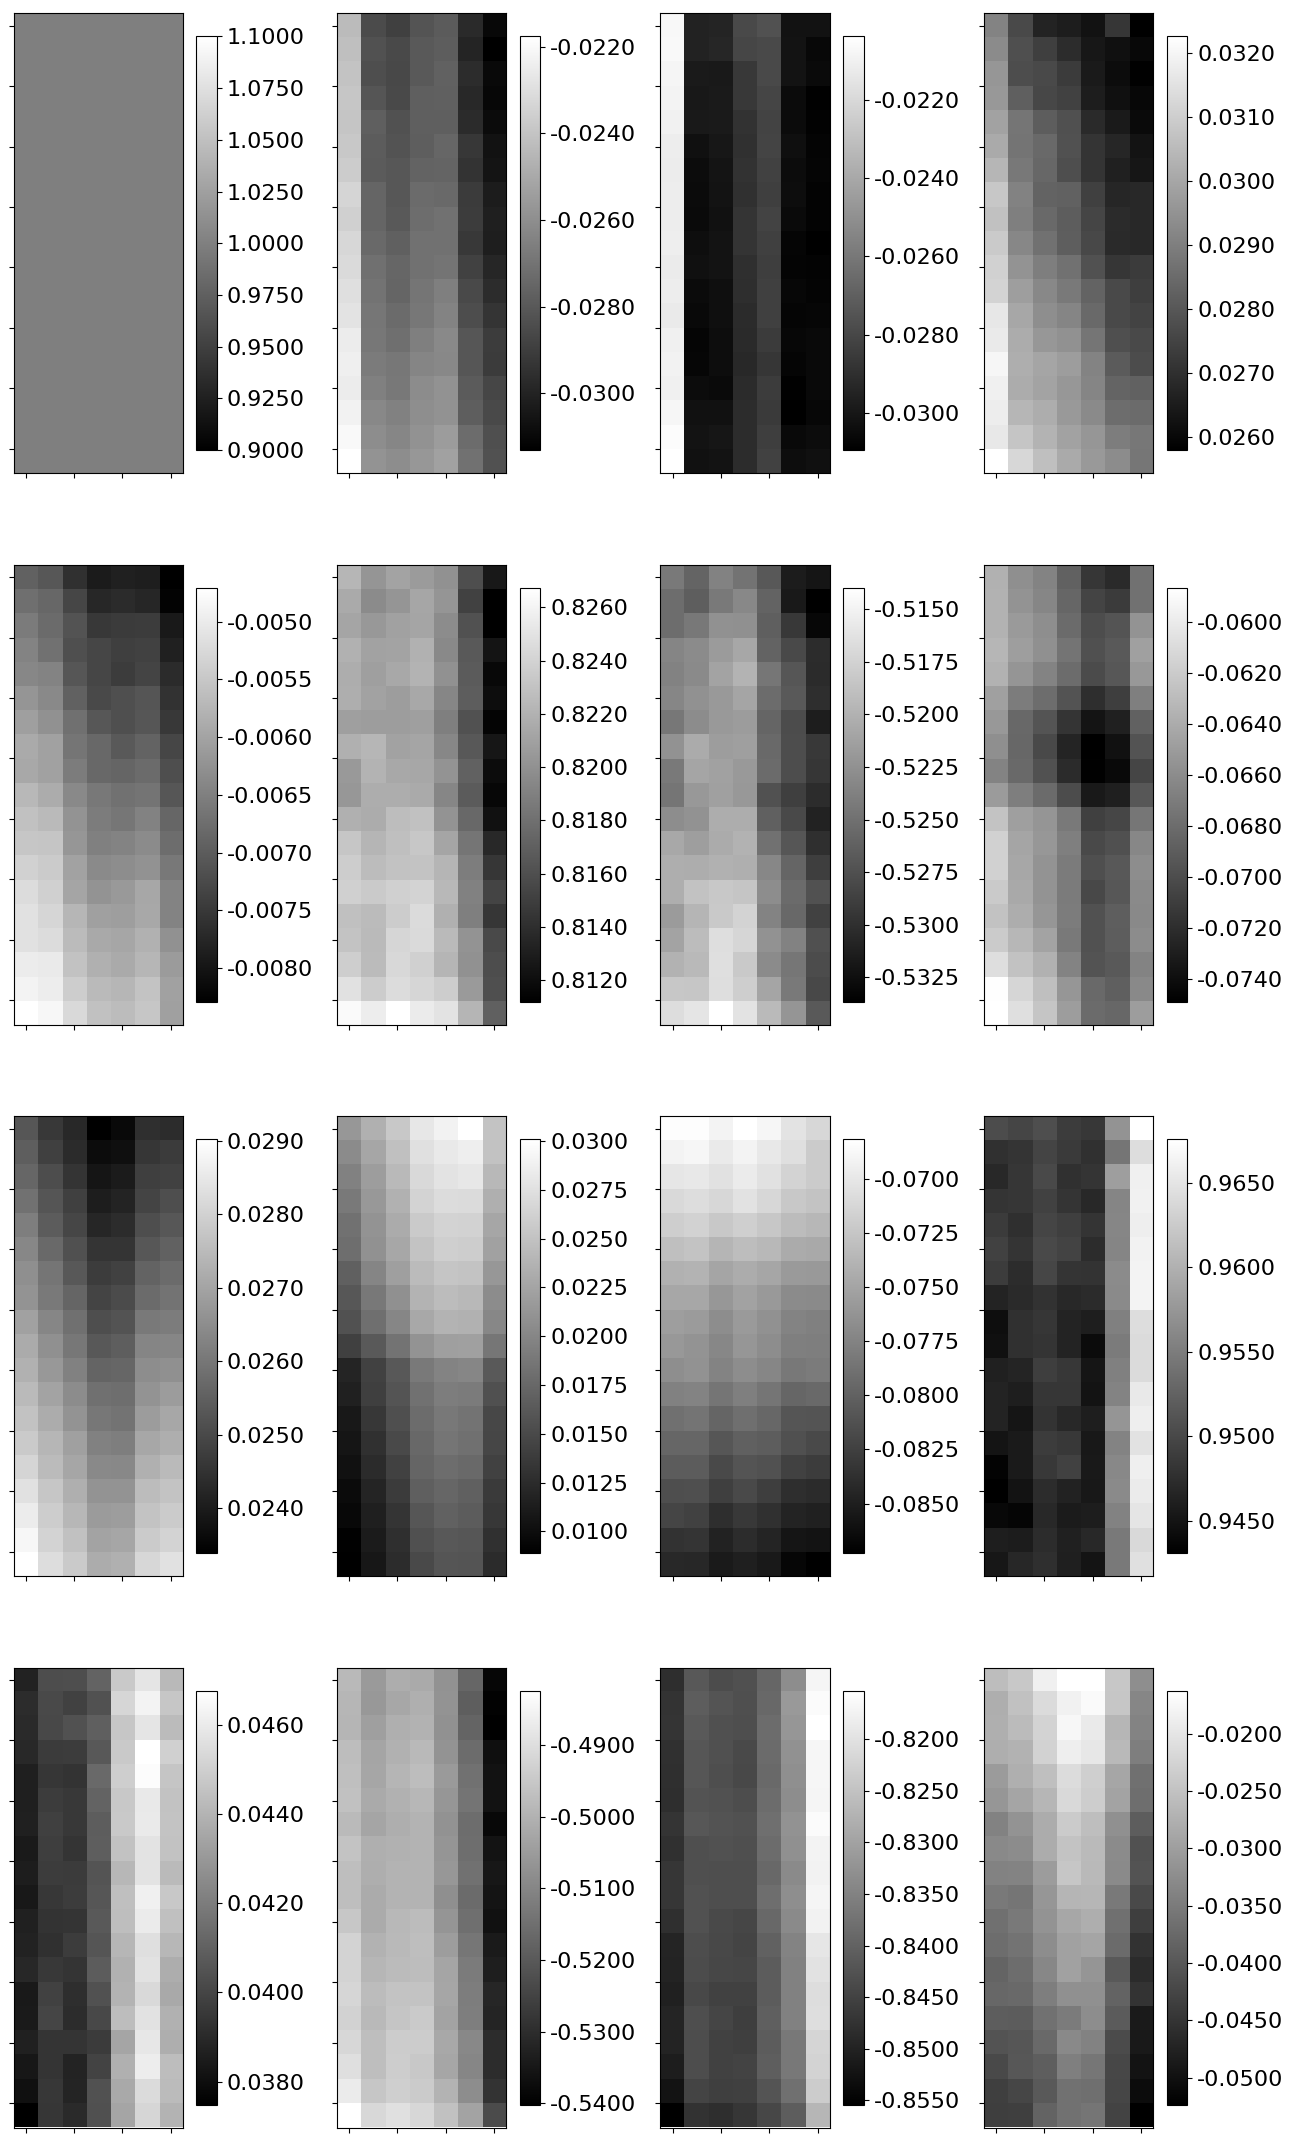

In [29]:
#
fig, ax = plt.subplots(4,4, figsize=(16,28), dpi=100)
"""        
tight = {
    "pad": 1,     # default
    "w_pad": 1, # decreasing the horizontal padding between axes
    "h_pad": 1   # by setting to -3 we attach axes vertically
}
fig.set_tight_layout(tight)
"""
#for n in range(main.responseMatrixMap.shape[0]):
n = 30
for i in range(4):
    for j in range(4):
        im = ax[i,j].imshow(main_uniform.responseMatrixMap[n,i,j]/main_uniform.responseMatrixMap[n,0,0], cmap="gray")
        cbar = plt.colorbar(im, ax=ax[i,j],shrink=0.9, format="%.4f", spacing='proportional', extend='neither')
        ax[i,j].tick_params(labelleft = "off",labelbottom='off') 
        cbar.ax.tick_params(labelsize=16)

homework:

- compare with tolerance matrix
- newton/coude mirror, imagerotator and 45mirror --> 2d
- free imagerotator ?
- spatial distribution with stray light and without stray light
- wavelength distribution aroung 8600A, whether is appropriate to interpretate other Ca-ir triplete 8498, 8542, 8666

## scaled sigma

In [15]:
main_scaled = Main(isDebug=False)
main_scaled.run(pathData, pathCamera01, threshold=129626, nCPU=1, isMap=True, isSigma=True)
del main_scaled.iquv
del main_scaled.iquv_mean

--- Preparing fitting process ---
--- Start fitting process ---
time used in fitting:  4.657216
Fitting iquv_mean complete.
time used in fitting:  3.790036
time used in fitting:  3.781017
time used in fitting:  4.723755
time used in fitting:  5.611572
time used in fitting:  8.681631
time used in fitting:  6.630966
time used in fitting:  6.002152
time used in fitting:  4.368438
time used in fitting:  4.818857
time used in fitting:  7.089142
time used in fitting:  6.613016
time used in fitting:  10.707995
time used in fitting:  5.138922
time used in fitting:  6.946322
time used in fitting:  4.683256
time used in fitting:  3.35392
time used in fitting:  7.094809
time used in fitting:  6.077035
time used in fitting:  7.059774
time used in fitting:  6.115691
time used in fitting:  5.251121
time used in fitting:  3.830881
time used in fitting:  3.332181
time used in fitting:  5.270278
time used in fitting:  6.448844
time used in fitting:  6.025041
time used in fitting:  8.314133
time used in

In [18]:
with open('/nwork/kouui/dstsp/20171128Camera01_8600A_19by7_scaledSigma.pickle', 'wb') as handle:
    pickle.dump(main_scaled, handle, protocol=pickle.HIGHEST_PROTOCOL)

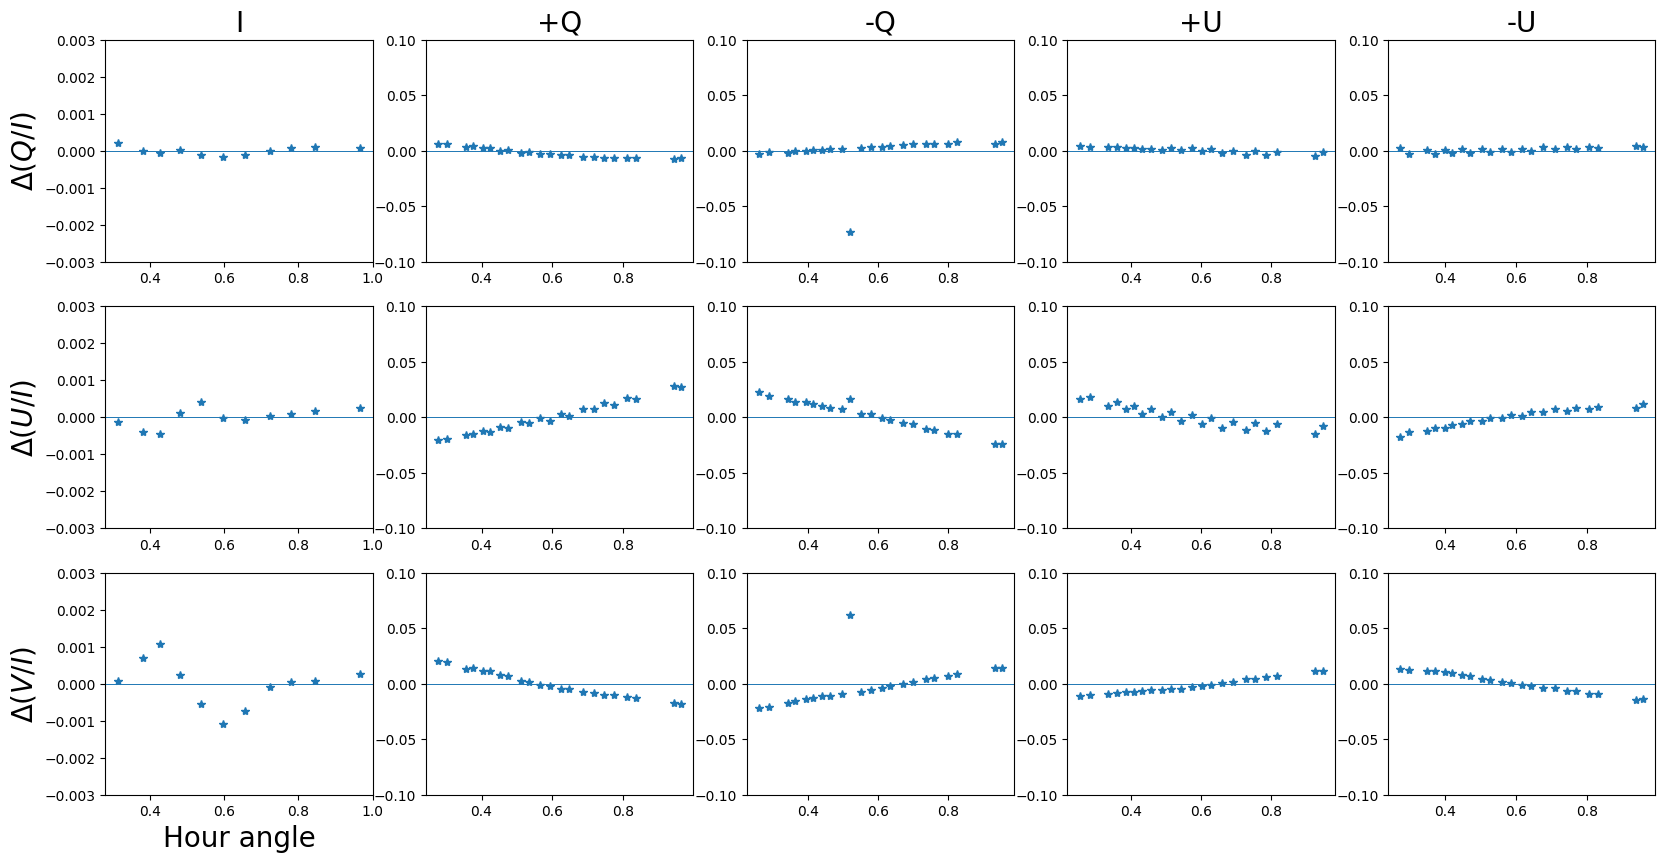

In [21]:
plotResidual(main_scaled.result_Mean.residual*main_scaled.sigma, ha, key, ylim_I=0.003)

---

# 20161202

In [108]:
%run scipt_to_run_on_kipsua.py /nwork/kouui/dstsp/data/calibration/20161202/camera01/cal /nwork/kouui/dstsp/data/calibration/20161202/camera01/cal

['scipt_to_run_on_kipsua.py', '/nwork/kouui/dstsp/data/calibration/20161202/camera01/cal', '/nwork/kouui/dstsp/data/calibration/20161202/camera01/cal']
pathData     :  /nwork/kouui/dstsp/data/calibration/20161202/camera01/cal
pathCamera01 :  /nwork/kouui/dstsp/data/calibration/20161202/camera01/cal
--- Preparing fitting process ---
ref_index ref_time ok.
calibration data dictionary ok.


KeyboardInterrupt: 

uniform sigma

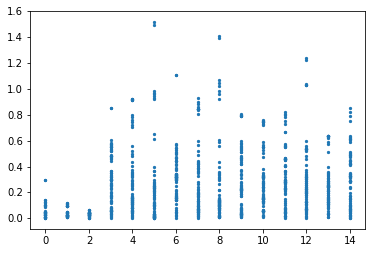

In [5]:
plt.scatter(main.key, abs(main.result.residual)*main.sigma, s=5);

tolerance sigma

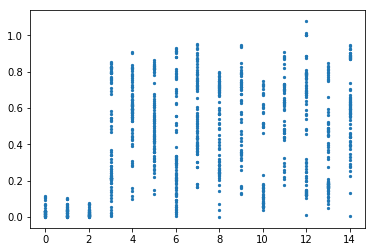

In [5]:
plt.scatter(main.key, abs(main.result.residual)*main.sigma, s=5);

---

# test multiprocessing

In [14]:
from multiprocessing import Pool
import os, time

In [78]:
def function(x):
    #やりたいこと
    print( 'process id:' + str(os.getpid()) )
    t = x + 2
    time.sleep(t)
    return x,t

def multi(n):
    p = Pool(4) #最大プロセス数:10
    result = p.map(function, [i for i in range(n)])
    p.close()
    return result

def go():
    data = multi(20)
    for i in data:
        print(i)

data = multi(4)

process id:23492
process id:23493
process id:23491
process id:23494


Process ForkPoolWorker-48:
Process ForkPoolWorker-47:
Process ForkPoolWorker-45:
Process ForkPoolWorker-46:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/rh/rh-python35/root/usr/lib64/python3.5/multiprocessing/process.py", line 254, in _bootstrap
    self.run()
  File "/opt/rh/rh-python35/root/usr/lib64/python3.5/multiprocessing/process.py", line 254, in _bootstrap
    self.run()
  File "/opt/rh/rh-python35/root/usr/lib64/python3.5/multiprocessing/process.py", line 254, in _bootstrap
    self.run()
  File "/opt/rh/rh-python35/root/usr/lib64/python3.5/multiprocessing/process.py", line 254, in _bootstrap
    self.run()
  File "/opt/rh/rh-python35/root/usr/lib64/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/rh/rh-python35/root/usr/lib64/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._ar

In [79]:
data

[(0, 2), (1, 3), (2, 4), (3, 5)]

In [106]:
def func(n, argument1, argument2):
    # 2倍して5を足す処理
    return n * argument1 + argument2

def wrapper(args):
    # argsは(i, 2, 5)となっている
    return func(*args)

def multi_process(sampleList):
    # プロセス数:4(4個のcpuで並列処理)
    p = Pool(4)
    output = p.map(wrapper, sampleList)
    # プロセスの終了
    p.close()
    return output

num = 100
# (i, 2, 5)が引数になる
sampleList = [(i, 2, 5) for i in range(num)]
output = multi_process(sampleList)

In [107]:
output

[5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109,
 111,
 113,
 115,
 117,
 119,
 121,
 123,
 125,
 127,
 129,
 131,
 133,
 135,
 137,
 139,
 141,
 143,
 145,
 147,
 149,
 151,
 153,
 155,
 157,
 159,
 161,
 163,
 165,
 167,
 169,
 171,
 173,
 175,
 177,
 179,
 181,
 183,
 185,
 187,
 189,
 191,
 193,
 195,
 197,
 199,
 201,
 203]

In [113]:
def func2(a, b, c):
    
    print("a : ", a)
    print("b : ", b)
    print("c : ", c)
    
    return None

def func1(args):
    
    return func2(*args)

arguments = []
a = np.arange(4)
b = np.random.randn(4,4)
for i in range(4):
    arguments.append( (a, b, 5) )

p = Pool(4)
result = p.map(func1, arguments)

a :  [0 1 2 3]
a :  [0 1 2 3]
a :  [0 1 2 3]
a :  [0 1 2 3]
b :  [[-0.8051673   0.13727314 -0.9084904  -0.60139178]
 [ 0.32468318 -1.84548104 -0.61089776 -0.24874331]
 [ 0.09097783 -0.57950924  1.09881249  1.00638602]
 [-0.03700205  1.45760666  2.31003344  1.04571731]]b :  [[-0.8051673   0.13727314 -0.9084904  -0.60139178]
 [ 0.32468318 -1.84548104 -0.61089776 -0.24874331]
 [ 0.09097783 -0.57950924  1.09881249  1.00638602]
 [-0.03700205  1.45760666  2.31003344  1.04571731]]b :  [[-0.8051673   0.13727314 -0.9084904  -0.60139178]
 [ 0.32468318 -1.84548104 -0.61089776 -0.24874331]
 [ 0.09097783 -0.57950924  1.09881249  1.00638602]
 [-0.03700205  1.45760666  2.31003344  1.04571731]]b :  [[-0.8051673   0.13727314 -0.9084904  -0.60139178]
 [ 0.32468318 -1.84548104 -0.61089776 -0.24874331]
 [ 0.09097783 -0.57950924  1.09881249  1.00638602]
 [-0.03700205  1.45760666  2.31003344  1.04571731]]



c :  5
c :  5
c :  5
c :  5
